In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [10]:
def plot_histogram(data):
    # Count occurrences of each 'd' value
    d_counts = data['d'].value_counts().sort_index()
    
    # Convert 'd' values to strings for labeling
    d_labels = d_counts.index.astype(str)
    
    # Plotting the bar chart
    plt.figure(figsize=(10, 6))
    plt.bar(d_labels, d_counts.values)
    plt.xlabel('d values (as strings)')
    plt.ylabel('Count')
    plt.title('Count of d Values')
    plt.xticks(d_labels)
    plt.show()


In [31]:
def plot_histogram_failure(df, available_d):
        # Convert 'd' column to floats and then back to strings for consistency
    df['d'] = df['d'].astype(float).astype(str)
    d_values_str = [str(value) for value in available_d]

    # Group by 'd' and count the occurrences
    d_counts = df['d'].value_counts().reindex(d_values_str, fill_value=0)

    # Split the data based on 'FoS' threshold
    df['FoS_category'] = df['FoS'].apply(lambda x: 'red' if x < 1 else 'blue')

    # Group by 'd' and 'FoS_category' to count occurrences for stacking
    stacked_counts = df.groupby(['d', 'FoS_category']).size().unstack(fill_value=0).reindex(index=d_counts.index, fill_value=0)

    # Create the stacked bar plot
    stacked_counts.plot(kind='bar', stacked=True, color=['red', 'blue'], figsize=(10, 6), label=['FoS < 1', 'FoS >= 1'])

    # Set labels and title
    plt.xlabel('d values')
    plt.ylabel('Count')
    plt.title('Stacked Bar Chart of d Values with FoS < 1 (Red) and FoS >= 1 (Blue)')
    plt.xticks(rotation=45)
    plt.legend(['FoS < 1', 'FoS >= 1'])
    plt.tight_layout()

    # Show the plot
    plt.show()




# Pin in Double Shear Dataset

In [2]:
# Load the dataset
file_path = '../pin_double_shear_dataset.csv'
data = pd.read_csv(file_path)

# Display the first few rows to understand the data structure
data.head(), data.columns


(     F  FoS   Sy    d
 0  100    1  415  1.5
 1  100    1  360  1.5
 2  100    1  215  1.5
 3  100    1  290  1.5
 4  100    1  275  1.5,
 Index(['F', 'FoS', 'Sy', 'd'], dtype='object'))

In [3]:
# print amount of data
print(data.shape)

(44850, 4)


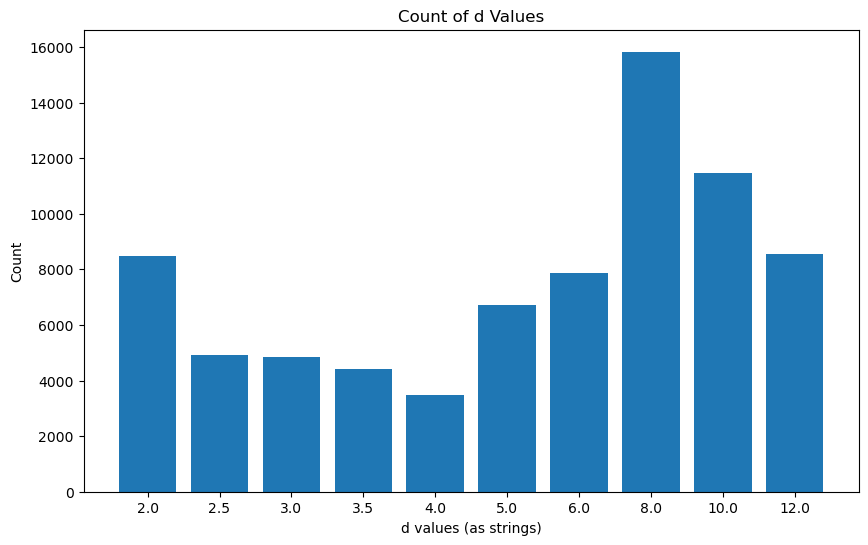

In [11]:
plot_histogram(data)

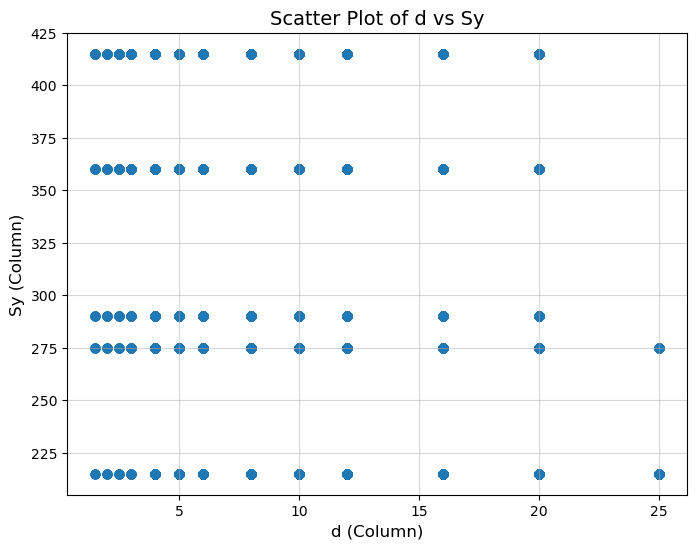

In [5]:
# Plot 2: Scatter plot of 'd' vs 'Sy'
plt.figure(figsize=(8, 6))
plt.scatter(data['d'], data['Sy'], alpha=0.7)
plt.title('Scatter Plot of d vs Sy', fontsize=14)
plt.xlabel('d (Column)', fontsize=12)
plt.ylabel('Sy (Column)', fontsize=12)
plt.grid(alpha=0.5)
plt.show()

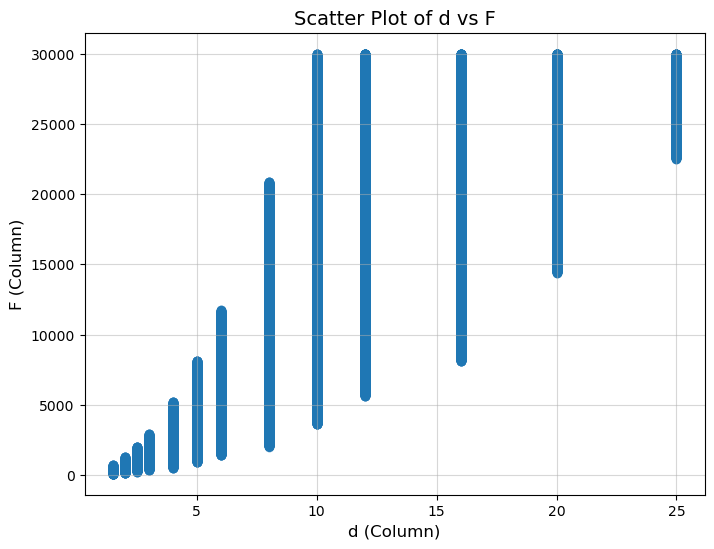

In [6]:
# Plot 3: Scatter plot of 'd' vs 'F'
plt.figure(figsize=(8, 6))
plt.scatter(data['d'], data['F'], alpha=0.7)
plt.title('Scatter Plot of d vs F', fontsize=14)
plt.xlabel('d (Column)', fontsize=12)
plt.ylabel('F (Column)', fontsize=12)
plt.grid(alpha=0.5)
plt.show()

# Bolt in Single Shear Dataset

In [38]:
# Load the dataset
file_path = '../bolt_single_shear_dataset.csv'
data = pd.read_csv(file_path)
data.head()

,F,FoS,Sy,d
0,100,0.1,450,2.0
1,100,0.1,600,2.0
2,100,0.1,650,2.0
3,100,0.1,940,2.0
4,100,0.1,1100,2.0


In [39]:
# print amount of data
print(data.shape)

(89700, 4)


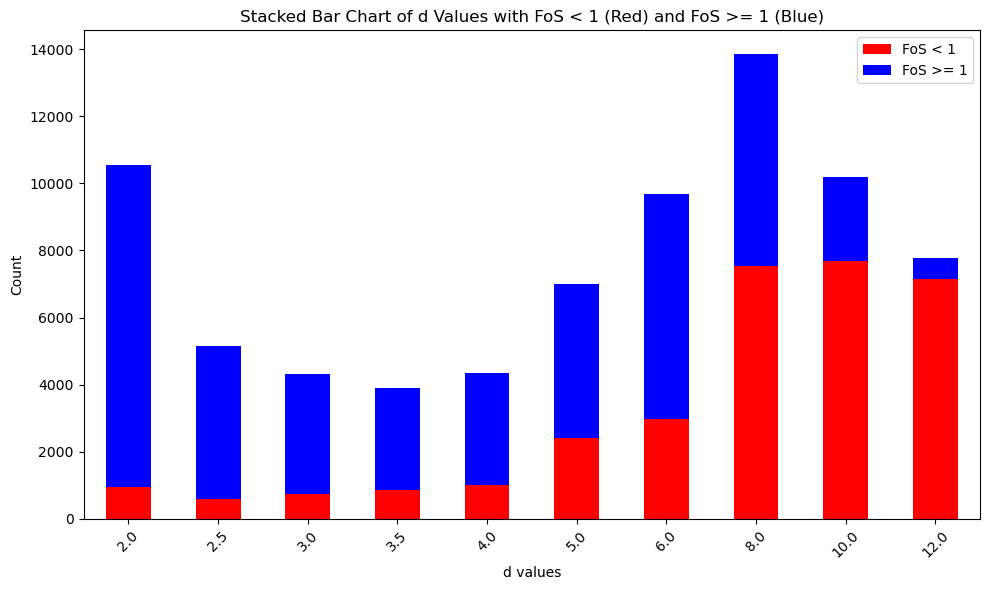

In [40]:
plot_histogram_failure(data, [2.0, 2.5, 3.0, 3.5, 4.0, 5.0, 6.0, 8.0, 10.0, 12.0])